---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Gathering, Description and Pre-processing**](#Section4)<br>
5. [**Exploratory Data Analysis**](#Section5)<br>
6. [**Model Preparation - RandomForestClassifier**](#Section6)</br>
7. [**Actionable Insights**](#Section7)</br>

---
<a name = Section1></a>
# **1. Introduction**
---


### YouthBank is a retail banking institution. ###

 - Going to float a stock trading facility for their existing customers.
 - The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
 - We will have to incentivize their customers to adopt their offerings.
 - One way to incentivize is to offer discounts on the commission for trading transactions.

### Current Scenario ###
The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.

---
<a name = Section2></a>
# **2. Problem Statement**
---

 - The current process suffers from the following problems:

 - One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
 
 - The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

 - The marketing department has hired you as a data science consultant because they want to supplement their campaigns with a more proactive approach.


 - Compnay has details of past customers and their status represented by column (Revenue_Grid 1 or 2).

## Project Deliverables ##
 - Deliverable: Predict whether a customer belongs to a high net worth or low net worth group.
 - Machine Learning Task: Classification
 - Target Variable: Revenue_Grid (High net worth (1) / Low net worth (2))
 - Win Condition: N/A (best possible model)

## Evaluation Metric ##
 - The model evaluation will be based on the F1 Score.


---
<a name = Section3></a>
# **3. Installing and importing Libraries**
---

In [1]:
#installing necessary libraries
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
#!pip install -q yellowbrick

In [4]:
#importing necessary libraries
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

---
<a name = Section4></a>
# **4. Data Gathering, Description and Pre-processing**
---

In [210]:
# Load the data
custTrain = pd.read_csv(filepath_or_buffer='./custTrain.csv')
custTest = pd.read_csv(filepath_or_buffer='./custTest.csv')

# Get the dimensions of data
print('Shape of the train dataset:',custTrain.shape)
print('Shape of the test dataset:',custTest.shape)

Shape of the train dataset: (8124, 32)
Shape of the test dataset: (2031, 31)


In [3]:
custTrain.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [51]:
custTest.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,1973,Meridian,BH21 2JQ,BH21,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,Male,South West,40.48,15.07,28.40,83.05
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,1996,Anglia,CM6 3QS,CM6,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,Male,South East,27.07,72.01,82.74,235.29
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,1958,HTV,BA12 9JW,BA12,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,Female,South West,44.39,32.62,43.86,98.38
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,1993,Grampian,AB22 8SP,AB22,18.98,60.98,0.00,17.99,9.99,0.00,102.43,44.96,0.00,0.00,0.00,Female,Scotland,21.59,24.57,29.23,86.32
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1976,Meridian,PO37 6AD,PO37,0.00,144.90,0.00,123.38,0.00,32.98,0.00,33.96,6.99,17.93,5.45,Female,South East,53.66,16.22,32.89,102.99


In [29]:
custTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [53]:
custTest.shape

(2031, 31)

In [10]:
custTrain.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [71]:
custTrain.skew()

REF_NO                             -0.012803
year_last_moved                   -10.639671
Average_Credit_Card_Transaction     3.761152
Balance_Transfer                    8.173734
Term_Deposit                        4.174163
Life_Insurance                      5.509379
Medical_Insurance                   3.361940
Average_A/C_Balance                 2.689985
Personal_Loan                      26.159596
Investment_in_Mutual_Fund           9.667247
Investment_Tax_Saving_Bond          3.191713
Home_Loan                           3.977657
Online_Purchase_Amount             21.763954
Investment_in_Commudity             4.816122
Investment_in_Equity               11.524906
Investment_in_Derivative           12.462312
Portfolio_Balance                   8.895472
Revenue_Grid                       -2.562680
dtype: float64

In [211]:
#gender column has 'Unknown' values
custTrain['gender'].value_counts()

Female     6106
Male       1987
Unknown      31
Name: gender, dtype: int64

In [212]:
#Gender Column has unknown, replacing them with mode ('female')

custTrain['gender'].replace('Unknown',custTrain['gender'].mode()[0],inplace=True)

In [213]:
custTrain['gender'].value_counts()

Female    6137
Male      1987
Name: gender, dtype: int64

In [214]:
custTrain['region'].value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

In [215]:
#Region Column has unknown, replacing them with mode ('South East')

custTrain['region'].replace('Unknown',custTrain['region'].mode()[0],inplace=True)

In [216]:
#after replacing the 'Unknown' values
custTrain['region'].value_counts()

South East          2546
North West          1517
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

In [217]:
#replacing 'Zero' with 0 in children column
custTrain['children'].replace('Zero','0',inplace=True)

In [225]:
custTrain['children'].value_counts()

0     4991
1     1474
2     1271
3      375
4+      13
Name: children, dtype: int64

In [218]:
#age_band has Unknown values
custTrain['age_band'].value_counts()

45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44
Name: age_band, dtype: int64

In [219]:
#replacing the Unknown values in age_band column with mode i.e. '45-50'
custTrain['age_band'].replace('Unknown',custTrain['age_band'].mode()[0],inplace=True)

In [220]:
#after replacing the 'Unknown' values
custTrain['age_band'].value_counts()

45-50    1142
41-45     903
36-40     895
55-60     865
31-35     840
51-55     833
26-30     735
61-65     700
65-70     468
22-25     356
71+       337
18-21      50
Name: age_band, dtype: int64

In [221]:
#occupation column has 'Unknown' values
custTrain['occupation'].value_counts()

Professional         1949
Retired              1799
Secretarial/Admin    1435
Housewife             984
Business Manager      578
Manual Worker         451
Unknown               449
Other                 432
Student                47
Name: occupation, dtype: int64

In [222]:
#replacing them with mode of the occupation column
custTrain['occupation'].replace('Unknown',custTrain['occupation'].mode()[0],inplace=True)

In [223]:
#after replacement
custTrain['occupation'].value_counts()

Professional         2398
Retired              1799
Secretarial/Admin    1435
Housewife             984
Business Manager      578
Manual Worker         451
Other                 432
Student                47
Name: occupation, dtype: int64

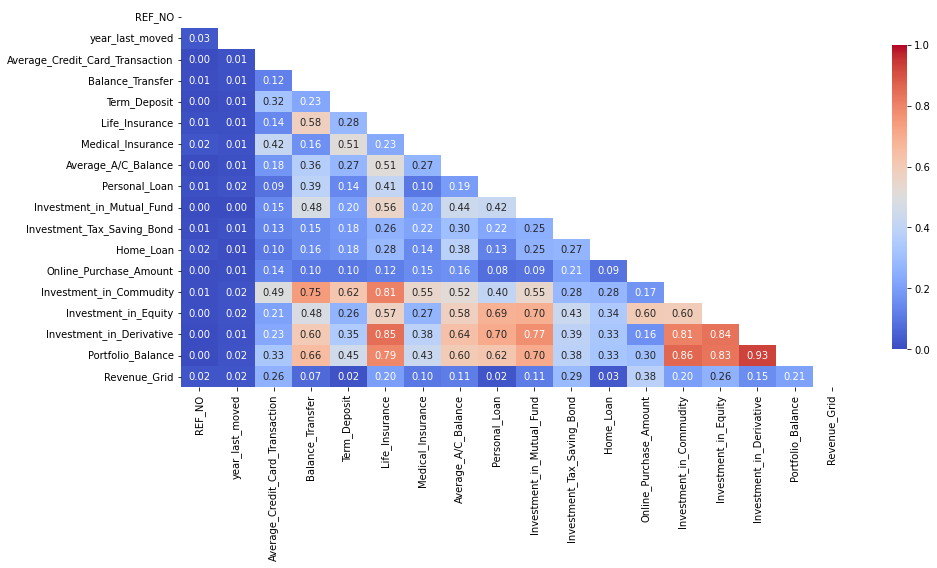

In [25]:
#correlation between various features
#by-default only numerical features are taken

corr = custTrain.corr().abs()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(15,7))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=0, vmax=1)
# yticks
#plt.yticks(rotation=0)
plt.show()

---
<a name = Section5></a>
# **5. Exploratory Data Analysis**
---

In [209]:
#function for annotating count plot

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## 5.1 Status of the customers Based on their Occupation ##

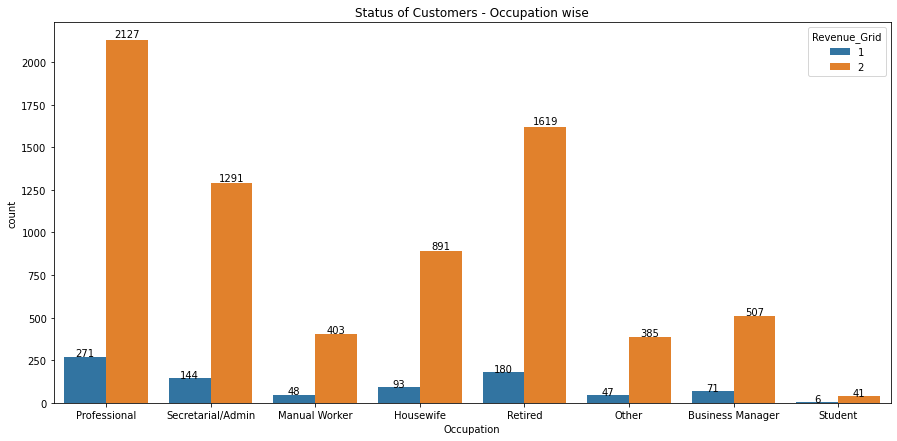

In [224]:
#Revenue Grid based on occupation
fig = plt.figure(figsize=[15, 7])


ax = sns.countplot(x='occupation',hue='Revenue_Grid',data=custTrain)

show_values(ax)

ax.set_title(label =  'Status of Customers - Occupation wise', size = 12)
ax.set_xlabel(xlabel = 'Occupation')
plt.show()

## 5.2 Status of the customers Based on Age Groups ##

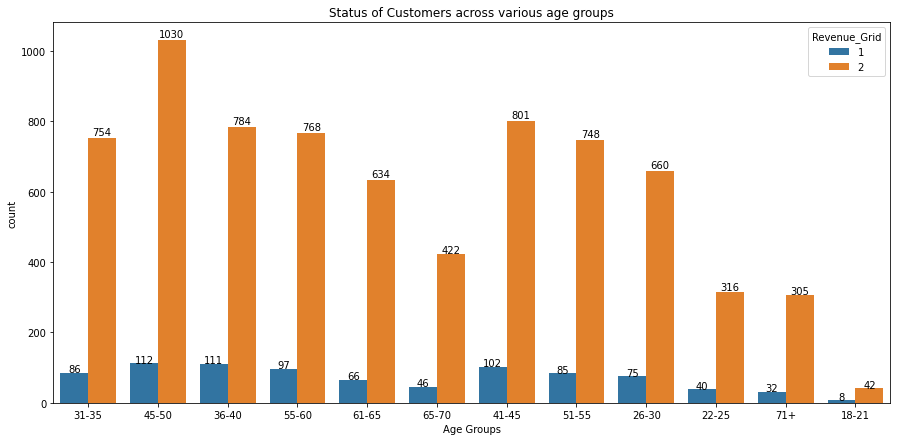

In [201]:
#displaying Revenue Grid data age group wise

fig = plt.figure(figsize=[15, 7])

ax = sns.countplot(x='age_band',hue='Revenue_Grid',data=custTrain)

show_values(ax)

ax.set_title(label =  'Status of Customers across various age groups', size = 12)
ax.set_xlabel(xlabel = 'Age Groups')
plt.show()

## 5.3 Total Count of Customers - High Net Worth Individual Revenue_Grid - 1

In [20]:
#train data
#count high net worth (1): 860
custTrain[(custTrain['Revenue_Grid']==1)]['REF_NO'].count()

860

## 5.4 Total Count of Customers - High Net Worth Individual and havign no Personal Loan

In [21]:
#train data
#Count of those high net worth (1) individuals who have personal_loan: 0.0: 492 i.e. more than 50%
# of total count of high net worth individuals
custTrain[(custTrain['Revenue_Grid']==1) & (custTrain['Personal_Loan'] <= 0.00)]['REF_NO'].count()

492

## 5.5 Total Count of Customers - Gender Wise

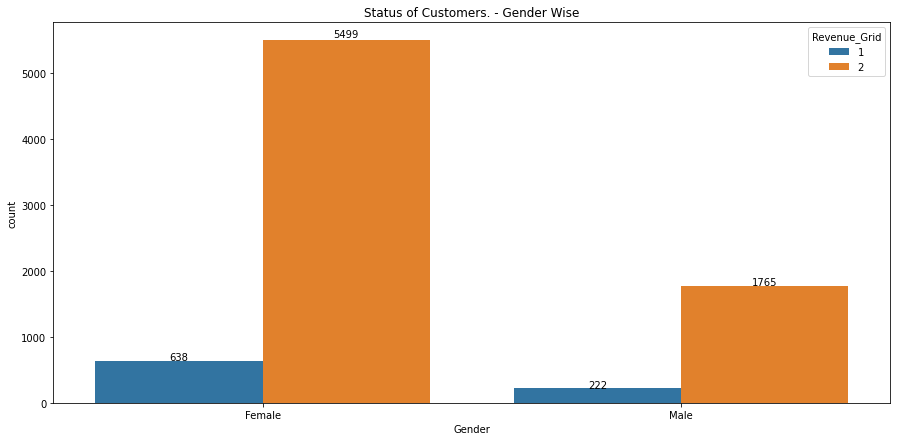

In [202]:

fig = plt.figure(figsize=[15, 7])

ax = sns.countplot(x='gender',hue='Revenue_Grid',data=custTrain)

show_values(ax)

ax.set_title(label = 'Status of Customers. - Gender Wise', size = 12)
ax.set_xlabel(xlabel = 'Gender')
plt.show()

## 5.6 Gender wise distribution of Customers having NIL Personal Loan value

In [204]:
dfNilPersonalLoan = custTrain[custTrain['Personal_Loan'] <= 0.00]

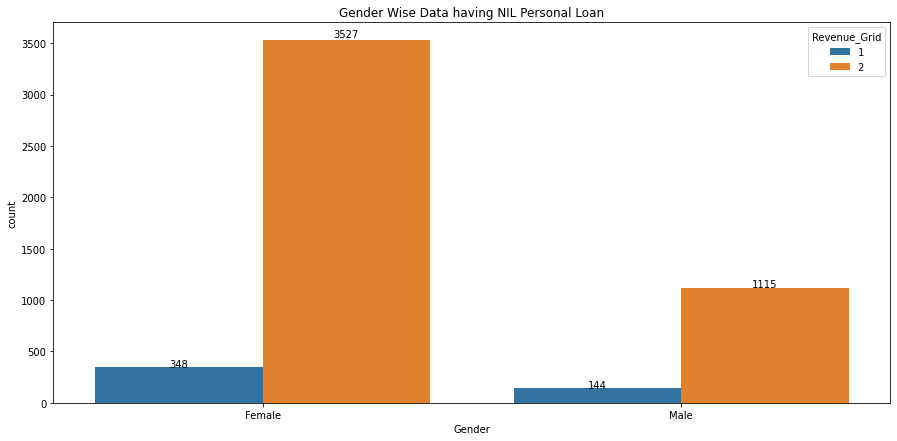

In [205]:
fig = plt.figure(figsize=[15, 7])

ax = sns.countplot(x='gender',hue='Revenue_Grid',data=dfNilPersonalLoan)

show_values(ax)

ax.set_title(label = 'Gender Wise Data having NIL Personal Loan', size = 12)
ax.set_xlabel(xlabel = 'Gender')
plt.show()

## 5.7 Total Count of Customers across Age Groups having NIL Personal Loan value

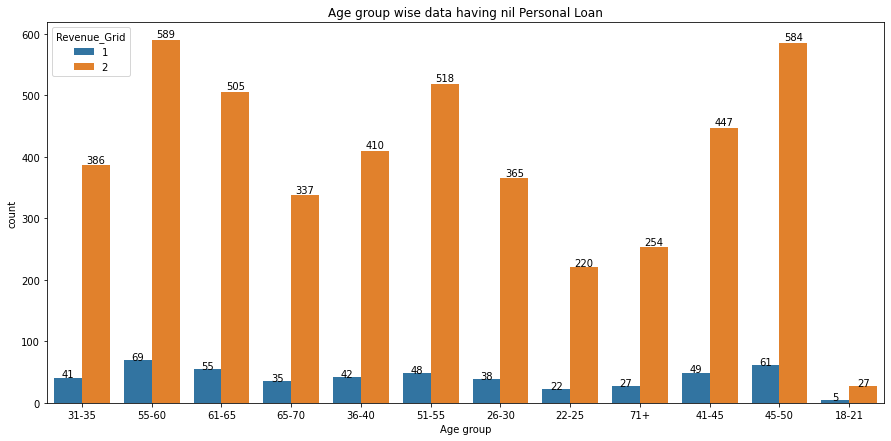

In [206]:
fig = plt.figure(figsize=[15, 7])

ax = sns.countplot(x='age_band',hue='Revenue_Grid',data=dfNilPersonalLoan)

show_values(ax)

ax.set_title(label = 'Age group wise data having nil Personal Loan', size = 12)
ax.set_xlabel(xlabel = 'Age group')
plt.show()

## 5.8 Total Count of Customers - Region Wise

posx and posy should be finite values
posx and posy should be finite values


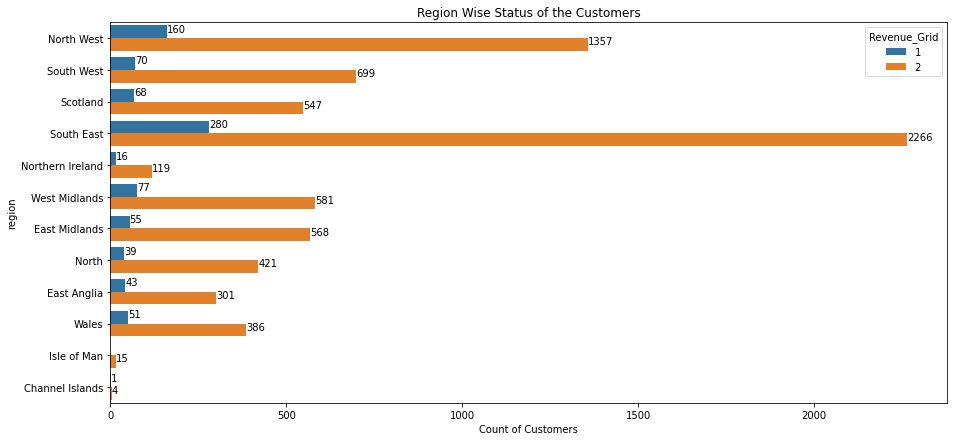

In [207]:
#displaying the HNI data region wise
#dataRegionWise = custTrain['region'][custTrain['Revenue_Grid']]

fig = plt.figure(figsize=[15, 7])


ax = sns.countplot(y='region',hue='Revenue_Grid',data=custTrain)

show_values(ax,'h',space=0)

ax.set_title(label = 'Region Wise Status of the Customers', size = 12)
ax.set_xlabel(xlabel = 'Count of Customers')

plt.show()


## 5.9 Gender Wise distribution of Customers  in High Net Worth Category

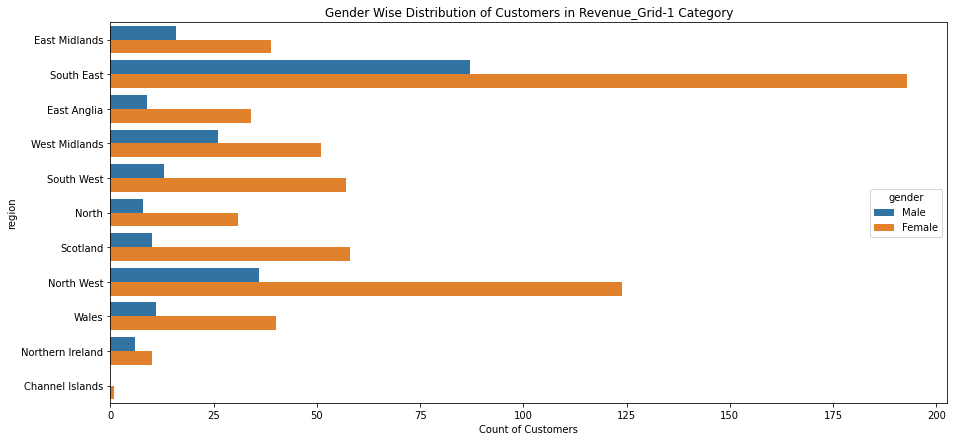

In [208]:

dataRegionWise = custTrain[custTrain['Revenue_Grid']==1]

fig = plt.figure(figsize=[15, 7])

ax = sns.countplot(y='region',hue='gender',data=dataRegionWise)

ax.set_title(label = 'Gender Wise Distribution of Customers in Revenue_Grid-1 Category', size = 12)
ax.set_xlabel(xlabel = 'Count of Customers')

plt.show()

# 6.0 Comparison of Number of Children between HNI(1) and LNI(2)

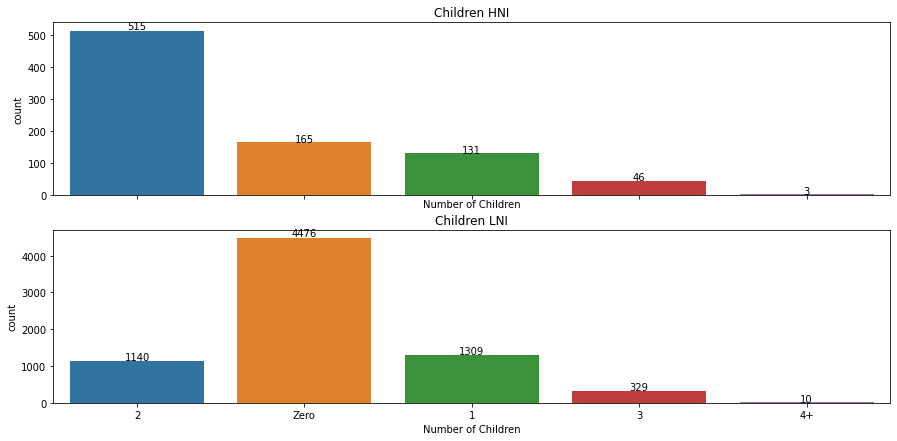

In [464]:
#train data
childData1 = custTrain['children'][custTrain['Revenue_Grid'] == 1]
childData2 = custTrain['children'][custTrain['Revenue_Grid'] == 2]


fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (15, 7))
sns.countplot(childData1,ax=ax1)
ax1.set_title(label = 'Children HNI', size = 12)
ax1.set_xlabel(xlabel = 'Number of Children')
show_values(ax1)

sns.countplot( childData2,ax=ax2)
ax2.set_title(label = 'Children LNI', size = 12)
ax2.set_xlabel(xlabel = 'Number of Children')
show_values(ax2)

plt.show()

## Observations ##

 - High Net worth (Revenue_Grid - 1) individuals are highest in the age group of 45-50, 36-40 and 41-45.
 - High net worth customers whose occupation is "Professional" have the highest count: 271, followed by Retired Customers; Count: 180
 - High Net worth Individuals are more in Female Gender (638) than Male (222)
 - South East region has the highest number of "High net worth Individuals" followed by region North West
 - The Number of Children (viz. 1,2, 3 or more) are less in HNI Customers than LNI customers.

---
<a name = Section6></a>
# **6. Model Preparation**
---

## NOTE: Model preparation and its evaluation is done on train data, and the model is used on test data to predict the target variable  - Revenue_Grid ##

## 6.1) Separating the input and output features and Scaling the input features ##

In [97]:
#using Standard Scaler
obj= StandardScaler()
  
# Splitting the independent and dependent variables
i_data = custTrain.drop(labels=['children','age_band','status','occupation','occupation_partner','self_employed','self_employed_partner','year_last_moved','TVarea','post_code','post_area','gender','region','home_status','family_income','Revenue_Grid'],axis=1)

response = custTrain.Revenue_Grid

scale = obj.fit_transform(i_data) 

#print(scale)

# standardization 


In [98]:
scale

array([[-9.97333156e-02,  7.29094386e-02, -2.03502249e-01, ...,
         1.87067993e+00,  2.64675865e+00,  2.50253426e+00],
       [ 9.91380538e-01,  2.48881962e-01,  3.59093837e-01, ...,
        -2.33495088e-01, -5.82764823e-02, -1.23150186e-03],
       [ 1.18793153e+00, -4.54617081e-01, -2.73431589e-01, ...,
        -6.10436282e-01, -6.76591939e-01, -6.91186795e-01],
       ...,
       [ 1.00128643e-01, -4.54617081e-01,  7.75634972e-01, ...,
         8.45490450e-02, -1.78965439e-03,  1.54266988e-01],
       [-1.45000552e+00, -4.54617081e-01,  1.69412082e-01, ...,
        -6.64683576e-01, -7.98684545e-01, -9.09937342e-01],
       [ 7.43359072e-01,  9.91486010e-01,  3.58967383e-01, ...,
         5.22247208e-01,  7.30512675e-01,  6.59637078e-01]])

## 6.2) Splitting the data into train and test ##

In [110]:
X_train,X_test, y_train , y_test = train_test_split(i_data, response,test_size=0.20, random_state=123)

print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (6499, 16)
X_test shape =  (1625, 16)
y_train shape =  (6499,)
y_test shape =  (1625,)


## 6.3) Using RandomForest Classifier Algorithm to create a Model ##

In [100]:
rfc = RandomForestClassifier(random_state=123)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

## 6.4) Predicting based on train data and checking accuracy of the model ##

In [101]:
y_test_pred = rfc.predict(X_test)

In [111]:
#checking Accuracy of the model
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[ 135   42]
 [  13 1435]]
              precision    recall  f1-score   support

           1       0.91      0.76      0.83       177
           2       0.97      0.99      0.98      1448

    accuracy                           0.97      1625
   macro avg       0.94      0.88      0.91      1625
weighted avg       0.97      0.97      0.96      1625



## 6.5) Using the test data to predict the target variable

### 6.5.1) Storing the input features in X_test

In [103]:
X_test = custTest.drop(labels=['children','age_band','status','occupation','occupation_partner','self_employed','self_employed_partner','year_last_moved','TVarea','post_code','post_area','gender','region','home_status','family_income'],axis=1)

### 6.5.2) Predicting the target feature based on X_test

In [104]:
y_pred = rfc.predict(X_test)

In [105]:
y_pred

array([2, 2, 2, ..., 1, 1, 2])

### 6.5.3) Storing the result of predicted variable in output file

In [106]:
output = pd.DataFrame({'REF Number': custTest.REF_NO, 'Revenue Grid': y_pred})
output.to_csv('submission.csv', index=False, header=False)

---
<a name = Section7></a>
# **7. Actionable Insights**
---

### Insights for High net worth Individuals

- Incentivise customers who are in the age group of 36-40 followed by 45-50 and 41-45.
- Offer discount schemes for Professionals 
- Offer discounts targeted to Female customers.
- Offer discounts to Retired customers to encourage them to invest in trading
- Offer discounts to TOP 3 regions viz. South East, North West and Northern Ireland respectively.